<a href="https://colab.research.google.com/github/alejandro-cermeno/freelance/blob/main/proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Ingrese una lista de precios en Excel para identificar el patrón
!pip install xlsxwriter
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import output
from google.colab import files
output.clear()

#print("Ingrese en Excel una lista de precios para identificar el patrón")
uploaded = files.upload()

print("")
print("")
print("Correcto, siguiente paso...")

Saving data26.xlsx to data26.xlsx


Correcto, siguiente paso...


número de patrones similares: 3 | Excel: SI

Mejor similitud 1: del día 38529  al día 38539
Mejor similitud 2: del día 59544  al día 59554
Mejor similitud 3: del día 72833  al día 72843




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

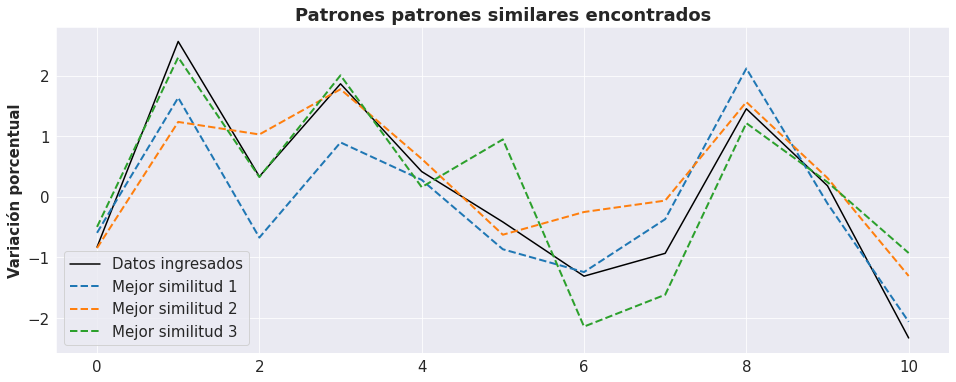

In [ ]:
#@title Preferencias de búsqueda

print("Ingrese el número de patrones similares a buscar: 1, 2 o 3")
n_pat = input()

valid_pat = ["1", "2", "3"]
while n_pat not in valid_pat:
  print("")
  print("Número de patrones invalido")
  print("Ingrese el número de patrones similares a buscar: 1, 2 o 3")
  n_pat = input()


print("")
print("Desea descargar un Excel con los resultados: si o no")
excel = input().upper()

excel_valid = ["SI", "SÍ", "NO"]
while excel not in excel_valid:
  print("")
  print("Alternativa invalida")
  print("Desea descargar un Excel con los resultados: si o no")
  excel = input().upper()

output.clear()

print("número de patrones similares:", n_pat, "| Excel:", excel)

inn = pd.read_excel(list(uploaded.keys())[0], header = None)

# Reducción de observaciones, probando...
path = "https://github.com/alejandro-cermeno/freelance/raw/main/productos_ventas_data.xlsx"
data = pd.read_excel(path)

# Se convierten los precios a variaciones porcentuales
inn = (100 * ( np.log(inn) - np.log(inn.shift(1)))).dropna()
var = (100 * ( np.log(data) - np.log(data.shift(1)))).dropna()

# Busqueda de patrones
results = pd.DataFrame()
win_size = len(inn)
step_size = 1
n_steps = len(var) - win_size - 1

for i in range(0, n_steps, step_size):
  
  window = var[0 + i : win_size + i] 
  rmse = np.sqrt(((inn.values - window.values) ** 2).mean())
  to_append = pd.DataFrame({"i": [i], "RMSE": [rmse]})                   
  results = results.append(to_append)

# Se ordenan los resultados
results = results.sort_values(by=["RMSE"])

# Presentación de resutados
if n_pat == "1":
  first_var = var[0 + results["i"].iloc[0] : win_size + results["i"].iloc[0]]
  first_data = data[0 + results["i"].iloc[0] : win_size + results["i"].iloc[0]]
  print("")
  print("Mejor similitud 1: del día", min(first_var.index) + 1, " al día",
        max(first_var.index) + 1)
  print("")
  print("")
  # Gráfico
  sns.set_style("darkgrid")
  plt.rc("figure", figsize=(16, 6))
  plt.rc("font", size = 15)
  plt.plot(inn.values, label = "Datos ingresados", color = "black")
  plt.plot(first_var.values, label = "Mejor similitud 1", linestyle='dashed', lw = 2)
  plt.title("Patrones patrones similares encontrados", fontweight = "bold")
  plt.ylabel("Variación porcentual", fontweight = 'bold')
  plt.legend()
  if excel == "SI": 
    first_data = first_data.reset_index()
    first_data.columns = ["día_similitud_1", "similitud_1"]
    first_var = first_var.reset_index()
    first_var.columns = ["día_similitud_1", "similitud_1"]
    out_data = pd.concat([first_data], axis=1)
    out_var = pd.concat([first_var], axis=1)
    writer = pd.ExcelWriter("/content/out.xlsx", engine = 'xlsxwriter')
    out_data.to_excel(writer, sheet_name = "precio", index = None)
    out_var.to_excel(writer, sheet_name = "variacion_porcentual", index = None)
    writer.save()
    files.download("out.xlsx")


elif n_pat == "2":
  first_var = var[0 + results["i"].iloc[0] : win_size + results["i"].iloc[0]]
  second_var =  var[0 + results["i"].iloc[1] : win_size + results["i"].iloc[1]]

  first_data = data[0 + results["i"].iloc[0] : win_size + results["i"].iloc[0]]
  second_data = data[0 + results["i"].iloc[1] : win_size + results["i"].iloc[1]]
  print("")
  print("Mejor similitud 1: del día", min(first_var.index) + 1, " al día",
        max(first_var.index) + 1)
  print("Mejor similitud 2: del día", min(second_var.index) + 1, " al día",
        max(second_var.index + 1))
  print("")
  print("")
  # Gráfico
  sns.set_style("darkgrid")
  plt.rc("figure", figsize=(16, 6))
  plt.rc("font", size = 15)
  plt.plot(inn.values, label = "Datos ingresados", color = "black")
  plt.plot(first_var.values, label = "Mejor similitud 1", linestyle='dashed', lw = 2)
  plt.plot(second_var.values, label = "Mejor similitud 2", linestyle='dashed', lw = 2)
  plt.title("Patrones patrones similares encontrados", fontweight = "bold")
  plt.ylabel("Variación porcentual", fontweight = 'bold')
  plt.legend()
  if excel == "SI": 
    first_var = first_var.reset_index()
    first_var.columns = ["día_similitud_1", "similitud_1"]
    second_var = second_var.reset_index()
    second_var.columns = ["día_similitud_2", "similitud_2"]

    first_data = first_data.reset_index()
    first_data.columns = ["día_similitud_1", "similitud_1"]
    second_data = second_data.reset_index()
    second_data.columns = ["día_similitud_2", "similitud_2"]
    out_var = pd.concat([first_var, second_var], axis=1)
    out_data = pd.concat([first_data, second_data], axis=1)

    writer = pd.ExcelWriter("/content/out.xlsx", engine = 'xlsxwriter')
    out_data.to_excel(writer, sheet_name = "precio", index = None)
    out_var.to_excel(writer, sheet_name = "variacion_porcentual", index = None)
    writer.save()
    files.download("out.xlsx")

elif n_pat == "3":
  first_var = var[0 + results["i"].iloc[0] : win_size + results["i"].iloc[0]]
  second_var =  var[0 + results["i"].iloc[1] : win_size + results["i"].iloc[1]]
  third_var =  var[0 + results["i"].iloc[2] : win_size + results["i"].iloc[2]]

  first_data = data[0 + results["i"].iloc[0] : win_size + results["i"].iloc[0]]
  second_data = data[0 + results["i"].iloc[1] : win_size + results["i"].iloc[1]]
  third_data =  data[0 + results["i"].iloc[2] : win_size + results["i"].iloc[2]]
  print("")
  print("Mejor similitud 1: del día", min(first_var.index) + 1, " al día",
        max(first_var.index) + 1)
  print("Mejor similitud 2: del día", min(second_var.index) + 1, " al día",
        max(second_var.index + 1))
  print("Mejor similitud 3: del día", min(third_var.index) + 1, " al día",
        max(third_var.index) + 1)
  print("")
  print("")
  # Gráfico
  sns.set_style("darkgrid")
  plt.rc("figure", figsize=(16, 6))
  plt.rc("font", size = 15)
  plt.plot(inn.values, label = "Datos ingresados", color = "black")
  plt.plot(first_var.values, label = "Mejor similitud 1", linestyle='dashed', lw = 2)
  plt.plot(second_var.values, label = "Mejor similitud 2", linestyle='dashed', lw = 2)
  plt.plot(third_var.values, label = "Mejor similitud 3", linestyle='dashed', lw = 2)
  plt.title("Patrones patrones similares encontrados", fontweight = "bold")
  plt.ylabel("Variación porcentual", fontweight = 'bold')
  plt.legend()
  # Exportar Excel
  if excel == "SI": 
    first_var = first_var.reset_index()
    first_var.columns = ["día_similitud_1", "similitud_1"]
    second_var = second_var.reset_index()
    second_var.columns = ["día_similitud_2", "similitud_2"]
    third_var = third_var.reset_index()
    third_var.columns = ["día_similitud_3", "similitud_3"]

    first_data = first_data.reset_index()
    first_data.columns = ["día_similitud_1", "similitud_1"]
    second_data = second_data.reset_index()
    second_data.columns = ["día_similitud_2", "similitud_2"]
    third_data = third_data.reset_index()
    third_data.columns = ["día_similitud_3", "similitud_3"]
    out_var = pd.concat([first_var, second_var, third_var], axis=1)
    out_data = pd.concat([first_data, second_data, third_data], axis=1)
    
    writer = pd.ExcelWriter("/content/out.xlsx", engine = 'xlsxwriter')
    out_data.to_excel(writer, sheet_name = "precio", index = None)
    out_var.to_excel(writer, sheet_name = "variacion_porcentual", index = None)
    writer.save()
    files.download("out.xlsx")